# **VALIDACIÓN DE LOS DATOS**

La validación de datos es un paso crucial en cualquier proyecto de data science. No es otra cosa que verificar la calidad y veradicidad de los datos trabajados en los ETL para evitar futuros errores

EMPEZAREMOS A TRABAJAR CON LOS ARCHIVO QUE RESULTARON DE LOS ETL.

### **Configuraciones Globales e Importaciones**
En esta sección, se instalan e importan todas las librerías y/o módulos necesarios y se establecen configuraciones globales de ser requerido. Se utilizan las siguientes librerías y herramientas:

In [1]:
#Se conecta Google Colaboratory con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Instala pyspark en Google Colaboratory
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=47045618d7dfc233d0c723b22052f9cef44150e94a41090363bb4af754113f97
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import re
import os # Proporciona funciones para interactuar con el sistema operativo.
import requests # Se utiliza para realizar solicitudes HTTP.
import pandas as pd # Una librería de análisis de datos.
import seaborn as sns #S e utiliza para la visualización de datos.
import pyspark.pandas as ps # Proporciona una interfaz para trabajar con datos en Spark utilizando el formato de DataFrame de pandas.
import json # Se utiliza para trabajar con datos en formato JSON.
from pyspark.sql import SparkSession # Se utiliza para crear una instancia de SparkSession, que es la entrada principal para trabajar con Spark SQL.
from pyspark.sql import functions as F #  Proporciona funciones para trabajar con datos en Spark DataFrame.
from pyspark.sql.functions import array_contains # Esta función se utiliza para filtrar los datos basados en la presencia de un valor en un array.
from pyspark.sql.functions import sum, col # Se utiliza para acceder a una columna en un DataFrame de Spark.
from pyspark.sql.functions import split, substring, concat_ws
from pyspark.sql.functions import expr
from pyspark.sql.types import StringType

In [5]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("validacioness")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()
spark

# **RUTA DE LOS ARCHIVOS**

## **GOOGLE**

### DataSet: METADATA - SITIOS

In [6]:
# Ruta a la carpeta que contiene los archivos CSV en Google Drive
carpeta = '/content/drive/MyDrive/Colab-Notebooks/transformaciones/meta-final.csv'

# Listar archivos en la carpeta
archivos = os.listdir(carpeta)

# Crear una lista para almacenar los DataFrames
df_list = []

# Iterar sobre los archivos y cargar cada archivo CSV en un DataFrame
for archivo_name in archivos:
    if archivo_name.endswith('.csv'):
        archivo_path = os.path.join(carpeta, archivo_name)
        df = spark.read.csv(archivo_path, header=True)
        # Convertir la columna "MISC" a tipo String si es necesario
        if 'MISC' in df.columns:
            df = df.withColumn("MISC", col("MISC").cast("string"))
        df_list.append(df)

# Unir los DataFrames en uno solo
df_meta = df_list[0]
for dataframe in df_list[1:]:
    df_meta = df_meta.unionByName(dataframe)

In [7]:
# Convertir el DataFrame de Spark a pandas DataFrame
df_meta = df_meta.toPandas()

### DataSet: REVIEWS - ESTADOS

In [8]:
# Ruta a la carpeta que contiene los archivos CSV en Google Drive
carpeta = '/content/drive/MyDrive/Colab-Notebooks/transformaciones/estados-limpios9.csv'

# Listar archivos en la carpeta
archivos = os.listdir(carpeta)

# Crear una lista para almacenar los DataFrames
df_list = []

# Iterar sobre los archivos y cargar cada archivo CSV en un DataFrame
for archivo_name in archivos:
    if archivo_name.endswith('.csv'):
        archivo_path = os.path.join(carpeta, archivo_name)
        df = spark.read.csv(archivo_path, header=True)
        # Convertir la columna "MISC" a tipo String si es necesario
        if 'MISC' in df.columns:
            df = df.withColumn("MISC", col("MISC").cast("string"))
        df_list.append(df)

# Unir los DataFrames en uno solo
df_es = df_list[0]
for dataframe in df_list[1:]:
    df_es = df_es.unionByName(dataframe)

## **YELP**

IMPORTAMOS CON PANDAS LOS ARCHIVOS DE **bussines, checkin, tip y user**

In [9]:
df_bussi = pd.read_csv('/content/drive/MyDrive/Colab-Notebooks/transformaciones/bussi-limpio.csv')
df_cki = pd.read_csv('/content/drive/MyDrive/Colab-Notebooks/transformaciones/checki-limpio.csv')
df_tip = pd.read_csv('/content/drive/MyDrive/Colab-Notebooks/transformaciones/tip-limpio.csv')
df_us = pd.read_csv('/content/drive/MyDrive/Colab-Notebooks/transformaciones/user-limpio.csv')

In [10]:
# Ruta a la carpeta que contiene los archivos CSV en Google Drive
carpeta = '/content/drive/MyDrive/Colab-Notebooks/Datos-Limpios/review-limpiowsen22.csv'

# Listar archivos en la carpeta
archivos = os.listdir(carpeta)

# Crear una lista para almacenar los DataFrames
df_list = []

# Iterar sobre los archivos y cargar cada archivo CSV en un DataFrame
for archivo_name in archivos:
    if archivo_name.endswith('.csv'):
        archivo_path = os.path.join(carpeta, archivo_name)
        df = spark.read.csv(archivo_path, header=True)
        # Convertir la columna "MISC" a tipo String si es necesario
        if 'MISC' in df.columns:
            df = df.withColumn("MISC", col("MISC").cast("string"))
        df_list.append(df)

# Unir los DataFrames en uno solo
df_rv = df_list[0]
for dataframe in df_list[1:]:
    df_rv = df_rv.unionByName(dataframe)

### **CONTEOS DE FILAS**

Evaluamos las cantidades de filas que quedo en cada _DATAFRAME_ para evitar errores en los futuros procesos.

In [11]:
#Conteo de filas de METADATA-SITIOS
df_meta.count()

address           464324
avg_rating        464324
category          464324
gmap_id           464324
latitude          464324
longitude         464324
name              464324
num_of_reviews    464324
url               464324
state             464324
city              464324
dtype: int64

In [12]:
#Conteo de filas de ESTADOS
df_es.count()

5784240

In [13]:
#Conteo de filas de BUSSINES
df_bussi.count()

Unnamed: 0      1554
business_id     1554
name            1554
address         1549
city            1554
state           1554
latitude        1554
longitude       1554
stars           1554
review_count    1554
attributes      1554
categories      1554
hours           1554
dtype: int64

In [14]:
#Conteo de filas de CHECKIN
df_cki.count()

business_id    10482361
date           10482361
dtype: int64

In [15]:
#Conteo de filas de TIP
df_tip.count()

Unnamed: 0          908848
user_id             908848
business_id         908848
text                908839
date                908848
compliment_count    908848
dtype: int64

In [16]:
#Conteo de filas de REVIEWS
df_rv.count()

14449003

In [17]:
#Conteo de filas de USER
df_us.count()

user_id               2105597
name                  2105009
review_count          2105597
useful                2105597
funny                 2105597
cool                  2105597
friends               2105597
fans                  2105597
average_stars         2105597
compliment_hot        2105597
compliment_more       2105597
compliment_profile    2105597
compliment_cute       2105597
compliment_list       2105597
compliment_note       2105597
compliment_plain      2105597
compliment_cool       2105597
compliment_funny      2105597
compliment_writer     2105597
compliment_photos     2105597
dtype: int64

### **DATOS NULOS**

Evaluamos datos nulos que quedaron en nuestro _DATAFRAME_, para lograr esto definiremos dos funciones que nos ayudarán a buscar los datos nulos

In [18]:
# Cuenta el número de nulos en cada columna

def conteo_nulos(dataframe):
    # Construye expresiones de agregación para contar nulos en cada columna
    expresiones_agregacion = [sum(col(c).isNull().cast("int")).alias(c) for c in dataframe.columns]

    # Aplica las expresiones de agregación al dataframe
    conteo_nulos_por_columna = dataframe.agg(*expresiones_agregacion)

    # Muestra el resultado
    conteo_nulos_por_columna.show()

In [19]:
def contar_nulos(dataframe):

    # Obtener la cantidad de valores nulos por columna
  nulos_por_columna = dataframe.isnull().sum()

  print("Cantidad de valores nulos por columna:\n", nulos_por_columna)

In [20]:
# Conteo de valores nulos en METADATA - SITIOS
contar_nulos(df_meta)

Cantidad de valores nulos por columna:
 address           0
avg_rating        0
category          0
gmap_id           0
latitude          0
longitude         0
name              0
num_of_reviews    0
url               0
state             0
city              0
dtype: int64


In [21]:
# Conteo de valores nulos en REVIEWS - ESTADOS
conteo_nulos(df_es)

+-------+----+------+----+-------+----+---------+
|gmap_id|name|rating|text|user_id|date|sentiment|
+-------+----+------+----+-------+----+---------+
|      0|  12|    12|  12|     24|  24|       24|
+-------+----+------+----+-------+----+---------+



In [22]:
# Conteo de valores nulos en BUSSINES - YELP
contar_nulos(df_bussi)

Cantidad de valores nulos por columna:
 Unnamed: 0      0
business_id     0
name            0
address         5
city            0
state           0
latitude        0
longitude       0
stars           0
review_count    0
attributes      0
categories      0
hours           0
dtype: int64


In [23]:
# Conteo de valores nulos en CHECKIN - YELP
contar_nulos(df_cki)

Cantidad de valores nulos por columna:
 business_id    0
date           0
dtype: int64


In [24]:
# Conteo de valores nulos en TIP - YELP
contar_nulos(df_tip)

Cantidad de valores nulos por columna:
 Unnamed: 0          0
user_id             0
business_id         0
text                9
date                0
compliment_count    0
dtype: int64


In [25]:
# Conteo de valores nulos en USER - YELP
contar_nulos(df_us)

Cantidad de valores nulos por columna:
 user_id                 0
name                  588
review_count            0
useful                  0
funny                   0
cool                    0
friends                 0
fans                    0
average_stars           0
compliment_hot          0
compliment_more         0
compliment_profile      0
compliment_cute         0
compliment_list         0
compliment_note         0
compliment_plain        0
compliment_cool         0
compliment_funny        0
compliment_writer       0
compliment_photos       0
dtype: int64


In [26]:
# Conteo de valores nulos en REVIEWS - YELP
conteo_nulos(df_rv)

+---------+-------+-----------+-------+-------+-------+-------+-------+---------+
|review_id|user_id|business_id| review| rating|   cool| useful|  funny|sentiment|
+---------+-------+-----------+-------+-------+-------+-------+-------+---------+
|        0|5043310|    5043310|5043310|7458723|7458723|9874136|9874136|  9874136|
+---------+-------+-----------+-------+-------+-------+-------+-------+---------+



### **DUPLICADOS**

Evaluamos datos *DUPLICADOS* que quedaron en nuestro _DATAFRAME_, para evitar tener errores en futuros analisis

In [28]:
# Verificación de columnas duplicadas en el DataFrame METADATA- SITIOS
columns = df_meta.columns.duplicated()
columns

array([False, False, False, False, False, False, False, False, False,
       False, False])

In [35]:
# Verificación de columnas duplicadas en el DataFrame Reviews - ESTADOS
duplicados = df_es.subtract(df_es.dropDuplicates())
# Muestra los registros duplicados
duplicados.show()

+-------+----+------+----+-------+----+---------+
|gmap_id|name|rating|text|user_id|date|sentiment|
+-------+----+------+----+-------+----+---------+
+-------+----+------+----+-------+----+---------+



In [36]:
# Verificación de columnas duplicadas en el DataFrame business_yelp
columns = df_bussi.columns.duplicated()
columns

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [37]:
# Verificación de columnas duplicadas en el DataFrame checkin - yelp
columns = df_cki.columns.duplicated()
columns

array([False, False])

In [38]:
# Verificación de columnas duplicadas en el DataFrame TIP - yelp
columns = df_tip.columns.duplicated()
columns

array([False, False, False, False, False, False])

In [39]:
# Verificación de columnas duplicadas en el DataFrame USER - yelp
columns = df_us.columns.duplicated()
columns

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [47]:
from pyspark.sql.functions import col

# Verificación de columnas duplicadas en el DataFrame Reviews - yelp
conteo_filas = df_rv.groupBy(df_rv.columns).count()

# Filtrar las filas duplicadas
filas_duplicadas = conteo_filas.filter(col('count') > 1)

# Mostrar las filas duplicadas
filas_duplicadas.show()


+--------------------+-------+-----------+------+------+----+------+-----+---------+-----+
|           review_id|user_id|business_id|review|rating|cool|useful|funny|sentiment|count|
+--------------------+-------+-----------+------+------+----+------+-----+---------+-----+
|               PROS:|   NULL|       NULL|  NULL|  NULL|NULL|  NULL| NULL|     NULL|  557|
|                 ...|   NULL|       NULL|  NULL|  NULL|NULL|  NULL| NULL|     NULL|  207|
|         Jazzy's BBQ|   NULL|       NULL|  NULL|  NULL|NULL|  NULL| NULL|     NULL|    2|
|   Service = 5 stars|   NULL|       NULL|  NULL|  NULL|NULL|  NULL| NULL|     NULL|   10|
|            3. Water|   NULL|       NULL|  NULL|  NULL|NULL|  NULL| NULL|     NULL|    2|
|                PROS|   NULL|       NULL|  NULL|  NULL|NULL|  NULL| NULL|     NULL|  217|
|Business Customer...|   NULL|       NULL|  NULL|  NULL|NULL|  NULL| NULL|     NULL|    3|
|Be prepared for a...|    5.0|          0|     0|     0|   1|  NULL| NULL|     NULL|    2|

### **HISTOGRAMA COLUMNAS NUMERICAS**

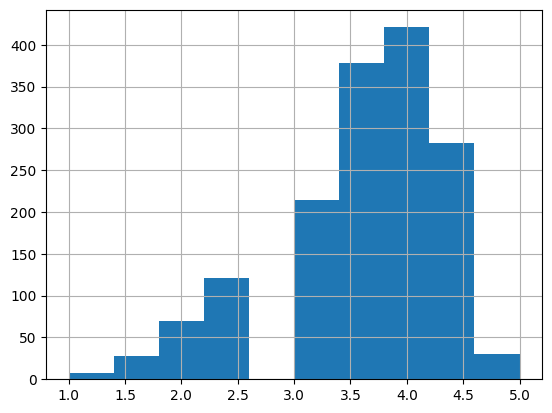

In [41]:
import matplotlib.pyplot as plt

# Histograma de una columna numérica
df_bussi['stars'].hist()
plt.show()


Evaluamos cuales son las franjas en el momento de poner estrelas a los comercios, y evidenciamos que son mucho mas las de 3.5 y 4.5

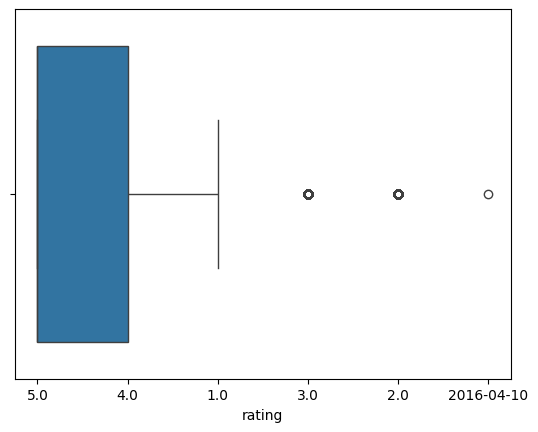

In [42]:
# Tomar una muestra aleatoria del DataFrame de Spark
df_es_sample = df_es.sample(fraction=0.1, seed=42)

# Convertir el DataFrame de la muestra a Pandas
df_es_pandas = df_es_sample.toPandas()

# Diagrama de caja de una columna numérica
sns.boxplot(x=df_es_pandas['rating'])
plt.show()



In [43]:
df_bussi.head()

,Unnamed: 0,business_id,name,address,city,state,latitude,longitude,stars,review_count,attributes,categories,hours
0,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,39.955505,-75.155564,4.0,80,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,29,sqSqqLy0sN8n2IZrAbzidQ,Domino's Pizza,3001 Highway 31 W,White House,CA,36.464747,-86.659187,3.5,8,{'RestaurantsPriceRange2': '1'},"Pizza, Chicken Wings, Sandwiches, Restaurants","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ..."
2,88,LhpPSrulqVeTyJeK2xydvQ,Fresh Fruits & Salads,114 N 3rd St,Camden,CA,39.946690,-75.123327,4.5,6,"{'BusinessParking': ""{'garage': False, 'street...","Juice Bars & Smoothies, Restaurants, Fruits & ...","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."
3,222,8c0r7olQSYGcws0bTd3ikw,Zesty Tsunami,6614 Osteen Rd,New Port Richey,CA,28.250218,-82.682441,4.0,5,"{'RestaurantsReservations': 'False', 'Restaura...","Hawaiian, Food, Food Trucks, Street Vendors, R...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
4,409,QWqKTWQ2OiDgo3dzNkpung,Jong Ka Jib,6600 N 5th St,Philadelphia,CA,40.052064,-75.127394,4.5,351,"{'Alcohol': ""u'none'"", 'RestaurantsGoodForGrou...","Korean, Restaurants","{'Monday': '10:30-22:30', 'Tuesday': '10:30-22..."


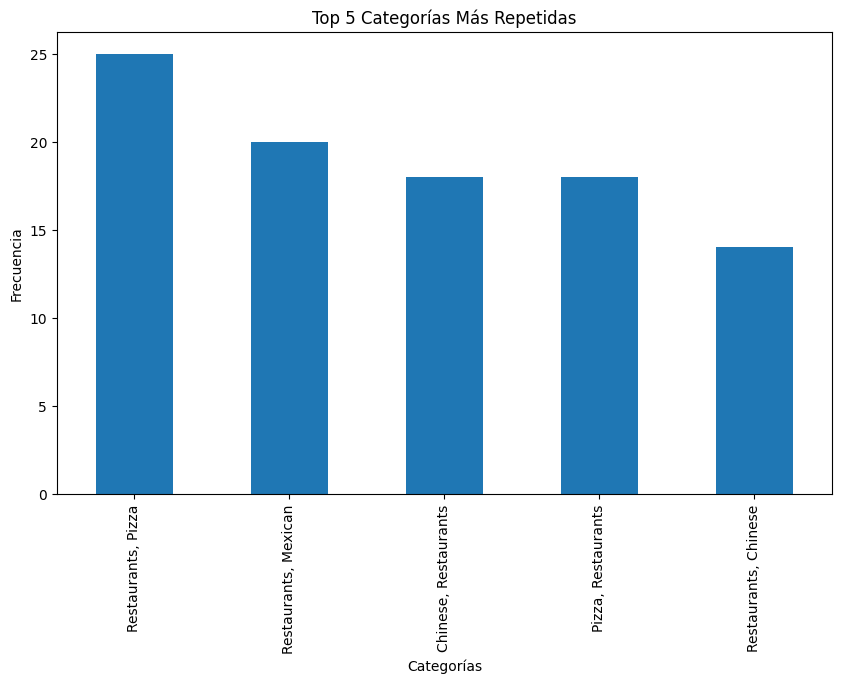

In [44]:
import matplotlib.pyplot as plt

# Conteo de las categorías y selección de las 5 más repetidas
categoria_counts = df_bussi['categories'].value_counts().nlargest(5)

# Graficar el conteo de las 5 categorías más repetidas
plt.figure(figsize=(10, 6))
categoria_counts.plot(kind='bar')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.title('Top 5 Categorías Más Repetidas')
plt.show()



en el top ten tenemos a restaurants, Pizzas como la de mayor cantidades

## **validación de datos para nuestro cliente**

In [46]:
cliente_sgambatis = df_meta[df_meta['category'].str.contains('fast food', case=False)]
print(cliente_sgambatis)

                                               address avg_rating  \
124                            Dunkin', 4008 Bell Blvd        3.5   
236            Cowboy Burgers & BBQ, 13101 Ramona Blvd        3.7   
245     Kennedy's Chicken & Sandwiches, 495 E 138th St        3.7   
361                         Taco Bell, 2101 Lombard St        3.3   
500                    Oh Oh El Coquito!, 208 Clove Rd        5.0   
...                                                ...        ...   
464038       Little Caesars Pizza, 109 N Brookhurst St        3.9   
464160                 A&W Restaurant, 301 N Willis St        4.4   
464174                 McDonald's, 2595 E Imperial Hwy        3.3   
464206                      Bagel Me!, 60 Plaza Square        4.2   
464278       Jersey Mike's Subs, 531-B N Hollywood Way        4.2   

                                                 category  \
124     Coffee shop, Bagel shop, Bakery, Breakfast res...   
236     Hamburger restaurant, American restaurant

Buscamos nuestro cliente dentro de la base de datos y seguimos teniendo sus datos